<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2023/blob/main/lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 6**


##**<font color = "green">Generative Adversary Network - GAN</font>**

*12 April 2023*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**


* ###  <font color='red'>How to generate new objects using deep neural networks?
* ###  <font color='red'>Can we generate, for example human faces?


<br>


**As always all slides are here:** 

*https://github.com/marcinwolter/Machine-learning-KISD-2023*

<br>




<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_100.png' width=650px>




**Generative Adversarial Nets \(GANs\)** were introduced by Ian Goodfellow and others in 2014\. Yann LeCun called **adversarial training** “the most interesting idea in the last 10 years in ML\.” </span><br>  <span style="color:#000000">[https://arxiv\.org/abs/1406\.2661](https://arxiv.org/abs/1406.2661)</span>

<span style="color:#000000">**GANs** can learn to mimic any distribution of data\. They can be taught to create worlds similar to our own in any domain: images\, music\, speech\, prose\. They are robot artists\!</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_101.png' width=450px>



<span style="color:#800000"> __Next Rembrandt project 2016__ </span>

<span style="color:#000000">Create automatically a new Rembrandt portrait based on a collection of Rembrandt works:</span>

<span style="color:#000000">[https://www\.nextrembrandt\.com/](https://www.nextrembrandt.com/)</span>  <span style="color:#000000"> </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_102.png' width=450px>

 **“The Next Rembrandt”**, a 2016 project funded by a variety of corporations led by financial services company ING, used AI to generate a new Rembrandt-like painting that was 3D printed and displayed. 

--- 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Edmond_de_Belamy.png/1920px-Edmond_de_Belamy.png' width=450px>
 
In 2018, the Obvious artist collective created **“Edmond de Belamy”**, a portrait that evokes what might be called an impressionistic Rembrandt, and which became the first AI painting sold at auction by Christie’s.


#<font color='green'>**How does GAN work?**
###**Blind forger and detective**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_104.png' width=450px>

* The forger has never seen Mona Lisa\, but gets the judgments of detective and tries to fool him \(i\.e\. paint something that looks like Mona Lisa\)\.

* <span style="color:#000000">They both \(forger and detective\) have to train in parallel \(important\)\, since if detective is to clever the forger will never paint anything acceptable\.</span>

---





#<font color='green'>**Generator and discriminator**

* <span style="color:#000000"> __Discriminative algorithms__ </span>  <span style="color:#000000"> \- classify input data; given the features\, they predict a label or category to which that data belongs \(</span>  <span style="color:#000000"> _signal_ </span>  <span style="color:#000000"> or </span>  <span style="color:#000000"> _background_ </span>  <span style="color:#000000">\)</span>
* <span style="color:#000000"> __Generative algorithms__ </span>  <span style="color:#000000">– do the opposite\, assuming the event is a </span>  <span style="color:#000000"> _signal_ </span>  <span style="color:#000000">\, how likely are these features? </span>
* <span style="color:#000000">A way to distinguish discriminative from generative algorithms is:</span>
  * <span style="color:#000000"> __Discriminative models__ </span>  <span style="color:#000000"> learn the boundary between classes</span>
  * <span style="color:#000000"> __Generative models__ </span>  <span style="color:#000000"> model the distribution of individual classes</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_103.png' width=350px>


#**How the GAN is built?**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20144540.png' width=650px>

* **Generator** gets a random vector as an input and transforms it into an image.<br>
In **Generative Models**
we try to learn the underlying the distribution
from which our dataset comes from. 
* **Discriminator** compares the generated data to the real data. 
* **Adversarial Training:**
GANS are made up of two competing networks (adversaries - generator and discriminator)
that are trying beat each other.



<img src='https://www.researchgate.net/profile/Bhaskar_Ghosh3/publication/344544069/figure/fig1/AS:944366453542923@1602165916976/Generative-Adversarial-Network-Architecture-2.jpg' width=650px>

#**Example generator code**

```python
    def __generator(self):
        """ Declare generator """

        model = Sequential()
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))

        return model
```



#**Example discriminator code**

```python
    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        model.add(Flatten(input_shape=self.shape))
        model.add(Dense((self.width * self.height * self.channels), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels)/2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        return model
```

#**Why LeakyReLu activation function?**



| <img src='https://cdn-media-1.freecodecamp.org/images/2Gt22y40ECfoeueVhbdJxlSxN56ANsdz1Upt' width=250px>  	|   <img src='https://cdn-media-1.freecodecamp.org/images/jnloudDblWrrXgjam9wLcJSIXhCkQsb4WIhz' width=250px>	|
|:-:	|:-:	|
|  ReLu 	|  LeakyReLu 	| 



A regular ReLU function works by truncating negative values to 0. This has the effect of blocking the gradients to flow through the network. Instead of the function being zero, leaky ReLUs allow a small negative value to pass through. That is, the function computes the greatest value between the features and a small factor.

Leaky ReLUs represent an attempt to solve the dying ReLU problem. This situation occurs when the neurons get stuck in a state in which ReLU units always output 0s for all inputs. For these cases, the gradients are completely shut to flow back through the network.

This is especially important for GANs since the only way the generator has to learn is by receiving the gradients from the discriminator.

#**How to train a GAN?**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20144714.png' width=650px>

We have to train discriminator to distinguish real and fake data...

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20145742.png'  width=650px>

... then train the generator to beat the discriminator.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20145842.png' width=650px>

We have to repeat this cycle many times to train both discriminator and generator in parallel.


#**Losses**

* Discriminator receives images from both the training set and the generator. Each mini-batch we get logits from the discriminator. These are the unscaled values from the model.

* In mini-batches the discriminator receives fake and real images. 
Because generator and discriminator train at the same time, GANs also need two optimizers. Each one for minimizing the discriminator and generator’s loss functions respectively.

* We want the discriminator to output probabilities close to 1 for real images and near 0 for fake images. To do that, the discriminator needs two losses. Therefore, the total loss for the discriminator is the sum of these two partial losses. **One for maximizing the probabilities for the real images and another for minimizing the probability of fake images.**




<span style="color:#800000"> __GANs example – hand\-written digits__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_105.png' width=650px>

<span style="color:#000000"> __Training set__ </span>  <span style="color:#000000"> – MNIST: hand\-written digits supplied by US post\.</span>

<span style="color:#000000"> __Discriminator__ </span>  <span style="color:#000000"> – convolutional neural network labeling images as real or fake\. </span>

<span style="color:#000000"> __Generator__ </span>  <span style="color:#000000"> \- inverse convolutional network \(while a standard convolutional classifier takes an image and downsamples it to produce a probability\, the generator takes a vector of random noise and upsamples it to an image\)\. </span>

<span style="color:#000000"> _Implementation: Python code using Keras interface and TensorFlow backend\._ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_106.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_107.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_108.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_109.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1010.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1011.png' width=450px>

<span style="color:#000000">Each cycle digits look more and more realistic\.</span>




---



In [5]:
""" Simple implementation of Generative Adversarial Neural Network """

import numpy as np

#from IPython.core.debugger import Tracer

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
#plt.switch_backend('agg')   # allows code to run without a system DISPLAY



# Define GAN network

In [6]:

class GAN(object):
    """ Generative Adversarial Network class """
    def __init__(self, width=28, height=28, channels=1):

        self.width = width
        self.height = height
        self.channels = channels

        self.shape = (self.width, self.height, self.channels)

        self.optimizer_g = Adam(learning_rate=0.0002, beta_1=0.5)
        self.optimizer_d = Adam(learning_rate=0.0002, beta_1=0.5)

        self.G = self.__generator()
        self.G.compile(loss='binary_crossentropy', optimizer=self.optimizer_g)

        self.D = self.__discriminator()
        self.D.compile(loss='binary_crossentropy', optimizer=self.optimizer_d, metrics=['accuracy'])

        self.stacked_generator_discriminator = self.__stacked_generator_discriminator()

        self.stacked_generator_discriminator.compile(loss='binary_crossentropy')


    def __generator(self):
        """ Declare generator """

        model = Sequential()
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))

        return model

    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        model.add(Flatten(input_shape=self.shape))
        model.add(Dense((self.width * self.height * self.channels), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels)/2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        return model

    def __stacked_generator_discriminator(self):

        self.D.trainable = False

        model = Sequential()
        model.add(self.G)
        model.add(self.D)

        return model

    def train(self, X_train, epochs=15000, batch = 32, save_interval = 200):

        for cnt in range(epochs):

            ## train discriminator
            random_index = np.random.randint(0, len(X_train) - batch/2)
            legit_images = X_train[random_index : random_index + int(batch/2)].reshape(int(batch/2), self.width, self.height, self.channels)

            gen_noise = np.random.normal(0, 1, (int(batch/2), 100))
            syntetic_images = self.G.predict(gen_noise)

            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            y_combined_batch = np.concatenate((np.ones((int(batch/2), 1)), np.zeros((int(batch/2), 1))))

            d_loss = self.D.train_on_batch(x_combined_batch, y_combined_batch)


            # train generator

            noise = np.random.normal(0, 1, (batch, 100))
            y_mislabled = np.ones((batch, 1))

            g_loss = self.stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

            if cnt % save_interval == 0:
                print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))

            if cnt % save_interval == 0:
                self.plot_images(save2file=False, step=cnt)

    # Define plotting function
    def plot_images(self, save2file=False, samples=16, step=0):
        ''' Plot generated images '''
        filename = "./mnist_%d.png" % step
        noise = np.random.normal(0, 1, (samples, 100))

        images = self.G.predict(noise)

        plt.figure(figsize=(7, 7))

        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.height, self.width])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()

        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()



# Actual training

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 784)               615440    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 392)               307720    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 392)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 393       
                                                                 
Total params: 923,553
Trainable params: 923,553
Non-tr

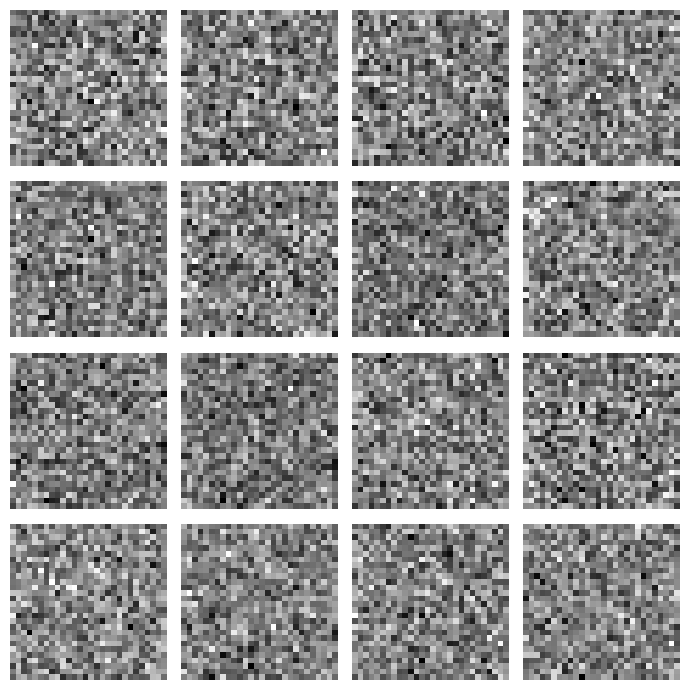

1/1 [==============================] - 0s 17ms/step
epoch: 200, [Discriminator :: d_loss: 0.766708], [ Generator :: loss: 0.689918]
1/1 [==============================] - 0s 19ms/step


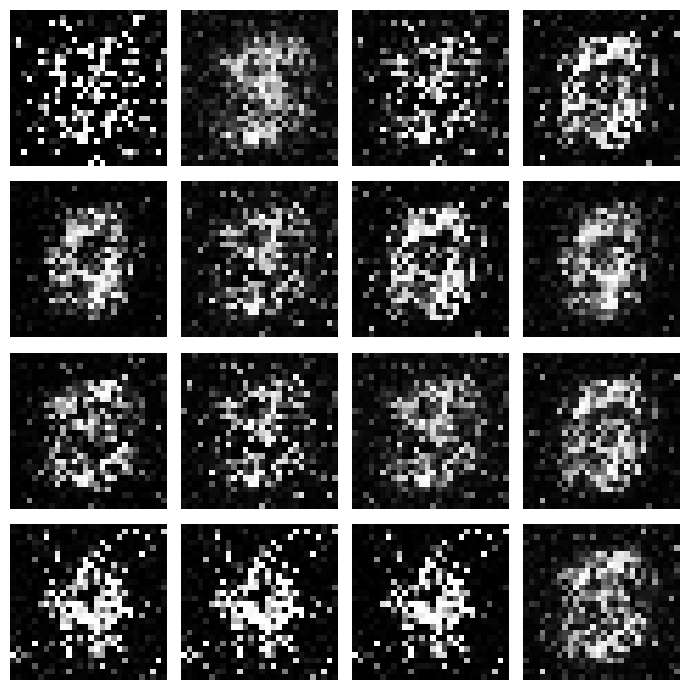

1/1 [==============================] - 0s 18ms/step
epoch: 400, [Discriminator :: d_loss: 0.704933], [ Generator :: loss: 0.707615]
1/1 [==============================] - 0s 20ms/step


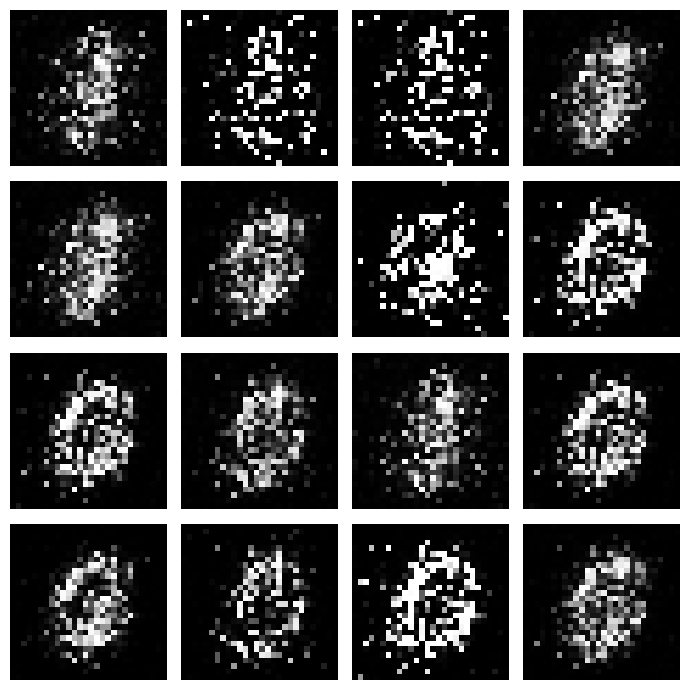

1/1 [==============================] - 0s 18ms/step
epoch: 600, [Discriminator :: d_loss: 0.719182], [ Generator :: loss: 0.671973]
1/1 [==============================] - 0s 18ms/step


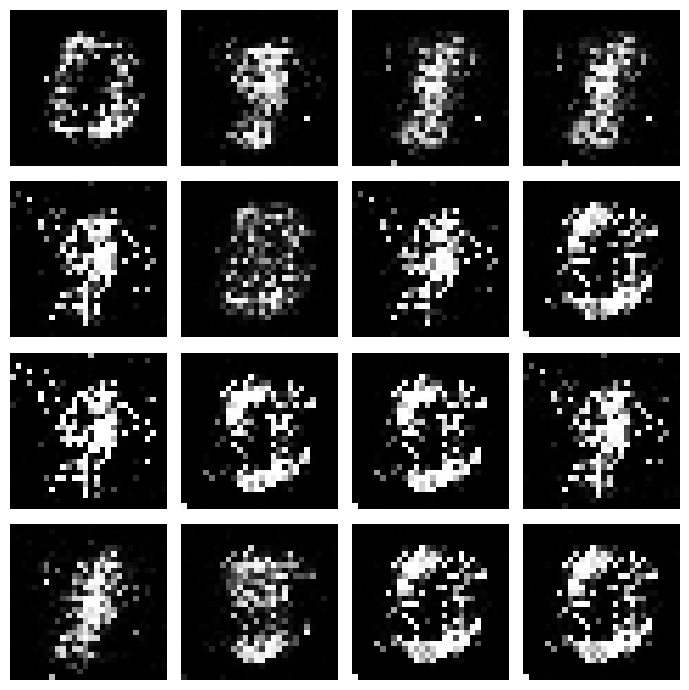

1/1 [==============================] - 0s 19ms/step
epoch: 800, [Discriminator :: d_loss: 0.683456], [ Generator :: loss: 0.716377]
1/1 [==============================] - 0s 19ms/step


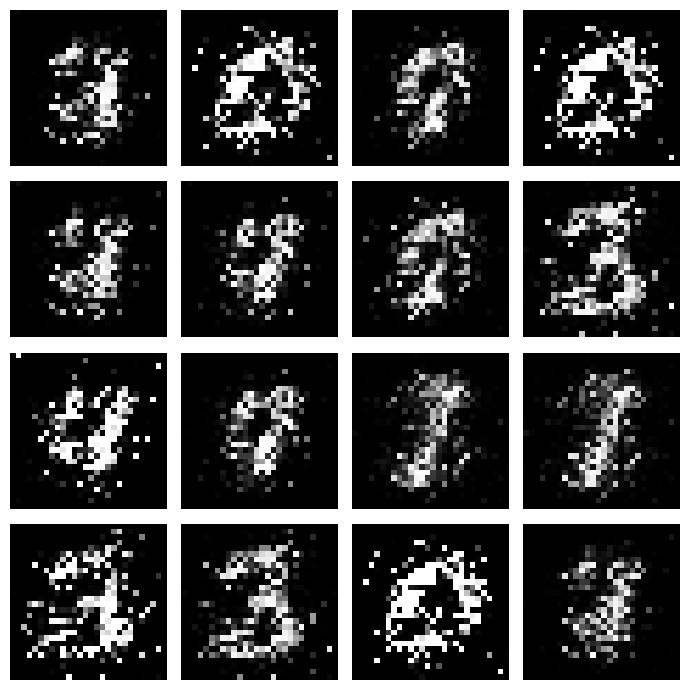

1/1 [==============================] - 0s 20ms/step
epoch: 1000, [Discriminator :: d_loss: 0.635515], [ Generator :: loss: 1.037115]
1/1 [==============================] - 0s 22ms/step


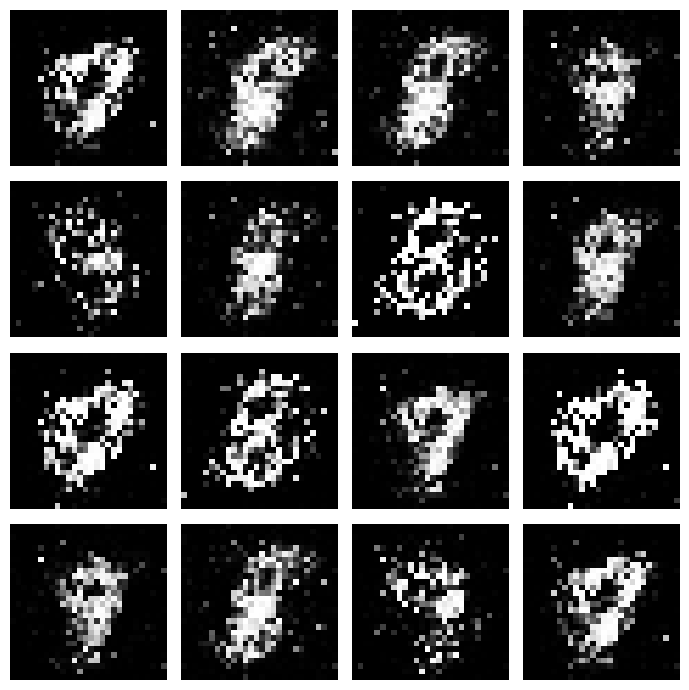

1/1 [==============================] - 0s 17ms/step
epoch: 1200, [Discriminator :: d_loss: 0.758824], [ Generator :: loss: 0.563969]
1/1 [==============================] - 0s 21ms/step


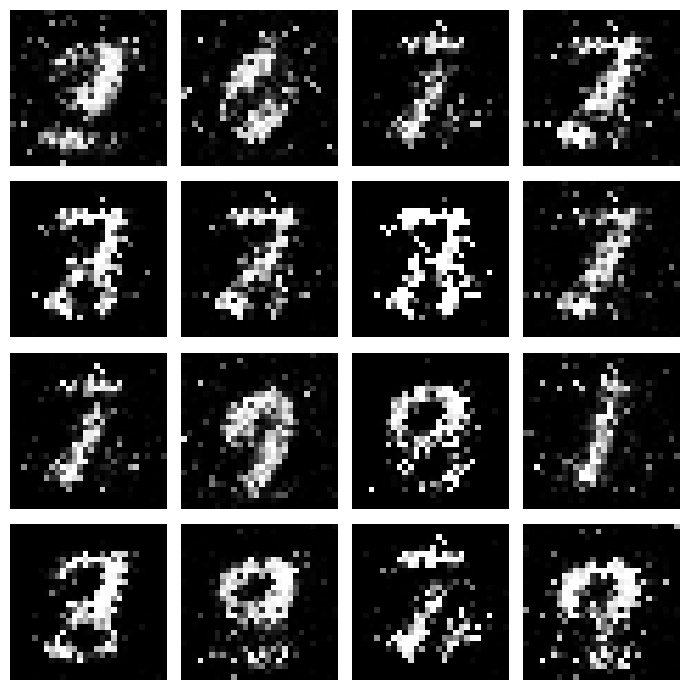

1/1 [==============================] - 0s 25ms/step
epoch: 1400, [Discriminator :: d_loss: 0.727496], [ Generator :: loss: 0.836819]
1/1 [==============================] - 0s 40ms/step


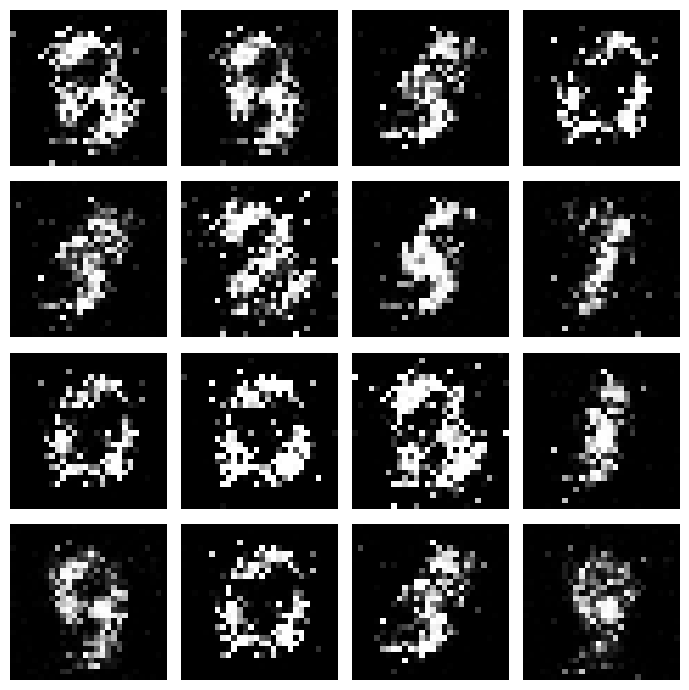

1/1 [==============================] - 0s 21ms/step
epoch: 1600, [Discriminator :: d_loss: 0.737056], [ Generator :: loss: 0.796525]
1/1 [==============================] - 0s 19ms/step


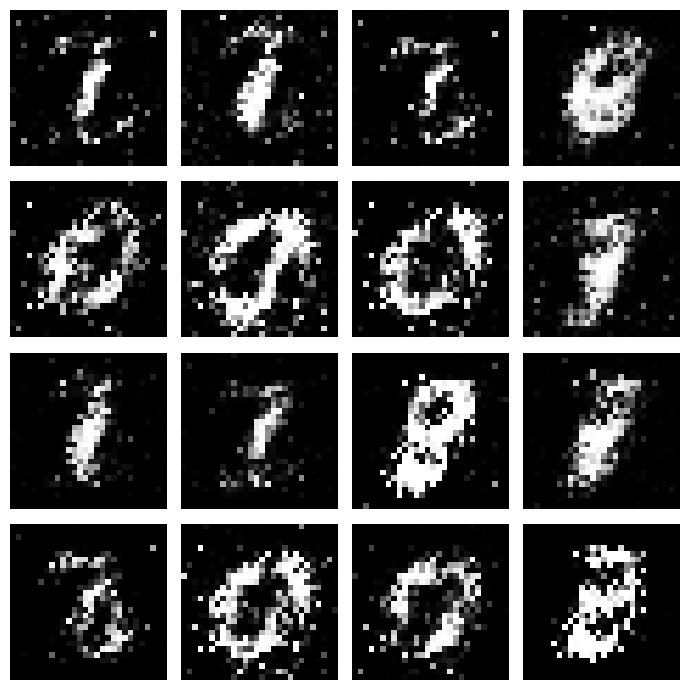

1/1 [==============================] - 0s 18ms/step
epoch: 1800, [Discriminator :: d_loss: 0.735638], [ Generator :: loss: 0.819730]
1/1 [==============================] - 0s 18ms/step


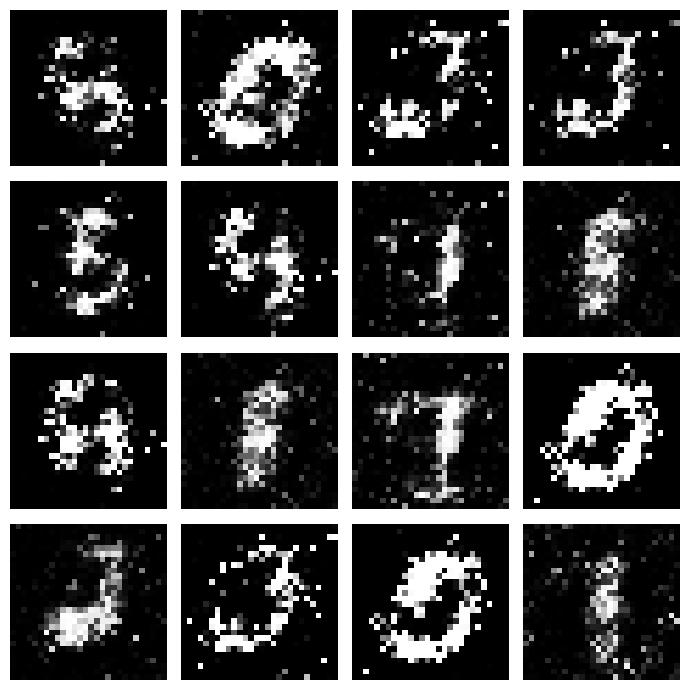

1/1 [==============================] - 0s 17ms/step
epoch: 2000, [Discriminator :: d_loss: 0.719608], [ Generator :: loss: 0.737085]
1/1 [==============================] - 0s 18ms/step


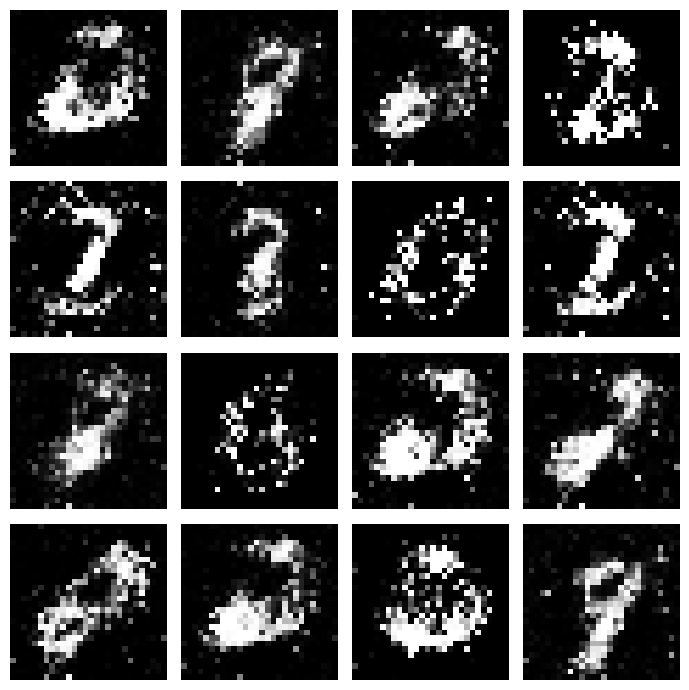

1/1 [==============================] - 0s 19ms/step


In [ ]:

if __name__ == '__main__':
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)


    gan = GAN()

    gan.train(X_train)



---



#**Failure Modes (ways in which GANs fail)**

**Mode collapse** — i.e., learn to produce one mode 
of data distribution. This happens, when discriminator performs much better than generator. 

In the process of training, the generator is always trying to find the one output that seems most plausible to the discriminator.
Because of that, the discriminator’s best strategy is always to reject the output of the generator. 

But if the next generation of discriminator gets stuck in a local minimum and doesn’t find its way out by getting its weights even more optimized, it’d get easy for the next generator iteration to find the most plausible output for the current discriminator. 

---

How to make the above code failing? Improve discriminator by replacing the dense network by the convolutional one and remove Dropout layers from the generator.

```python
    def __generator(self):
        """ Declare generator """

        model = Sequential()
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))

        return model

    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        model.add(Conv2D(64,(3,3), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))
        model.add(Conv2D(128,(3,3), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))
        #model.add(Flatten(input_shape=self.shape))
        #model.add(Dense(15*(self.width * self.height * self.channels), input_shape=self.shape))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dense(15*np.int64((self.width * self.height * self.channels)/2)))
        #model.add(LeakyReLU(alpha=0.2))    
        model.add(Flatten())           
        model.add(Dense(np.int64((self.width * self.height * self.channels))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        return model

```



#<font color='red'> **Exercise: Please test the GAN after these modifications!**

We should get something like that, generate just one digit instead of the spectrum of different digits:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1012.png' width=450px>


# **Deconvolutional GANs \(DCGAN\) \(Radford et al\.\, 2015\)**
https://arxiv.org/abs/1511.06434

Use for images – use convolutional DNN for both discriminator and generator

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1013.png' width=450px>



<span style="color:#03495C"> __Deconvolutional GANs \(DCGAN\)__ </span>  

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1014.png' width=450px>

* <span style="color:#0076A3"> __Based on LSUN data set__ </span>
  * <span style="color:#009DD9"> __10 scene categories__ </span>
  * <span style="color:#009DD9"> __20 object categories__ </span>
* <span style="color:#A9A100"> _[ArXiv ](https://arxiv.org/abs/1506.03365)_ </span>  <span style="color:#A9A100"> _[1506\.03365](https://arxiv.org/abs/1506.03365)_ </span>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1015.png' width=450px>

---

#**Generating hand\-written letters again:**

But this time we replace the dense layers in the generator and discriminator by convolutional layers:


```python

    def __generator(self):
        """ Declare generator """

        model = Sequential()
        '''
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))
        '''

        model.add(Input(shape=(100,)))
        model.add(Dense(7 * 7 * 128))
        model.add(Reshape((7, 7, 128)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))



        return model
```
The code with these modifications is here:

[https://github.com/marcinwolter/Machine-learning-KISD-2022/blob/main/dcgan_generate_letters.ipynb](https://github.com/marcinwolter/Machine-learning-KISD-2022/blob/main/dcgan_generate_letters.ipynb)

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1016.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1017.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1018.png' width=450px>



#**Generating faces**

Another DCGAN example is the code to generate new human faces from the database of celebrities photos (CELEBA - 200 000 photos) can be obtained from the Keras examples:

https://keras.io/examples/generative/dcgan_overriding_train_step/

<img src='https://i.imgur.com/h5MtQZ7l.png' width=650px>



I have run this code on another server. The face image was reduced to 32x32 pixels and the number of training images reduced to 100 000 due to limitations. 

Results:

(images here)


---

#<font color='red'>**(DC)GAN guidelines:**

---

* All the pooling layers are replaced with strided convolutions in the discriminator and fractional strided convolution in the generator**<sup>*</sup>**.
* No fully-connected or pooling layers are used.
* Batchnorm used in both Generator and Discriminator
* **ReLu** or **LeakyReLu** activation is used for the generator for all the layers except the last layer which uses **tanh**
* Discriminator uses **LeakyReLu** for all the layers

**<sup>*</sup>** <font size="2">*Fractionally strided convolutions, sometimes referred to as deconvolutions, transpose images, typically from a minimized format to a larger one. Imagine an image that has been reduced to a 2x2 pixel format. To transpose the image up to a larger format, a fractionally strided convolution reconstructs the image's spatial resolution, then performs the convolution.*</font> 


---

<font size="2"> ***source:** https://medium.com/analytics-vidhya/dcgan-tutorial-by-aniket-maurya-f6c137ef0053* </font> 

---



#**Providing Images as Input to Generator**

* **Image Super\-Resolution**  (Ledig et al\.\, 2017\)  https://openaccess.thecvf.com/content_cvpr_2017/papers/Ledig_Photo-Realistic_Single_Image_CVPR_2017_paper.pdf 

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1024.png' width=450px>




* **Cycle GANs** (Zhu et al\.\, 2017; arXiv:1703:10593v2 \) https://arxiv.org/abs/1703.10593v2

  Cycle GANs allow image-to-image translation given two image collections. Algorithm learns to translate an image from one collection to the other, does not require correspondence between images

  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1025.jpg' width=450px>

  <span style="color:#0076A3"> __Given two image collections:__ </span>
  * <span style="color:#009DD9"> __algorithm learns to translate an image from one collection to the other__ </span>
  * <span style="color:#009DD9"> __does not require corres\-pondence between images__ </span>

  **Photos to paintings:**
  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1026.jpg' width=450px>

  **Paintings to photos:**

  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1027.jpg' width=450px>

  A nice example of cycle GAN (converting horses to zebras) with some description can be found in keras examples: <br>
  https://keras.io/examples/generative/cyclegan/


* **Conditional GAN (CGAN)**

  A simple DCGAN doesn't let us control the appearance (e.g. class) of the samples we're generating. For instance, with a GAN that generates MNIST handwritten digits, a simple DCGAN wouldn't let us choose the class of digits we're generating. To be able to control what we generate, we need to condition the GAN output on a semantic input, such as the class of an image.

  During the training:
  * Latent variable is passed to the 
generator and the discriminator. 
  * The generator learns side information conditional 
distributions, as it is able to 
disentangle this from the overall 
latent space.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Summary-of-the-Differences-Between-the-Conditional-GAN-Semi-Supervised-GAN-InfoGAN-and-AC-GAN-1024x423.png' width=350px>

  **Example:**
  
  Conditional GAN in keras examples:
  https://keras.io/examples/generative/conditional_gan/

  in which MNIST hand written digits are generated, but we can choose which class to generate.


#**Known problems with GANs:**

<span style="color:#03495C"> __Problems With Counting__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1039.png' width=450px>



<span style="color:#03495C"> __Problems With Perspective__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1040.png' width=450px>



<span style="color:#03495C"> __Problems With Global Structure__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1041.png' width=450px>





#**Applications of GAN**

<span style="color:#000000">In science \- speed up generation of simulated data – new simulated event look similar to the once already simulated/collected data\.</span>

<span style="color:#000000">Overview of GAN applications:</span>

<span style="color:#000000">[https://machinelearningmastery\.com/impressive\-applications\-of\-generative\-adversarial\-networks/](https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/)</span>



# <font color='green'> **Some nice examples**


#**Add colors to pictures \- DeOldify**

<span style="color:#000000">[https://github\.com/jantic/DeOldify](https://github.com/jantic/DeOldify)</span>  <span style="color:#000000"> </span>

<span style="color:#000000">An open code project\, adds color to pictures and to the movies\. You can run it by yourself on Google Colab</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1029.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1030.png' width=450px>

Prof\. Henryk Niewodniczański

Founder of our Institute

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1031.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1032.png' width=450px>

---



## **Let us play with DeOldify**

* Open the github repository of DeOldify and run the code on Google Colab https://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColabStable.ipynb

* Give this photo as an input: 

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_xlarge.jpg' width=500px>

https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_xlarge.jpg

* DeOldify it: 

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwa_xlarge_colored.png' width=500px>

* Think what is wrong and why?

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_new.jpg' width=400px>


#**Make art with GAN\!\!\!**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1033.png' width=450px>

<span style="color:#FFFFFF"> __Sold for a reported__ </span>  <span style="color:#FF0000"> __for $432\,500__ </span>  <span style="color:#FFFFFF"> __at an auction\!\!\!__ </span>

"Edmond de Belamy" is part of a fictitious family created by a "generative adversarial network\," of which there's ten other paintings\. "Edmond" is one of the most striking of the paintings\, and will likely become an important part of art history going forward thanks to its huge selling price\. The generator behind the painting created new portraits based on 15\,000 from the last 600 years\, taking existing art and crafting something wholly original and quite alien\.

---

#**Create a new Rembrandt painting** 
based on all of his works: </span>  <span style="color:#000000">[https://www\.nextrembrandt\.com/](https://www.nextrembrandt.com/)</span>  <span style="color:#000000"> </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1034.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1035.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1036.png' width=450px>



#<font color='green'> **Summary:**

* <span style="color:#000000">Many new methods were developed recently\.</span>

* <span style="color:#000000">Machine Learning approach becomes to be used not only for classification\, but also for generative tasks\.</span>

* <span style="color:#000000">Each month new application appear\! </span>



---

#<font color='red'>**That's all!!!**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1037.png' width=350px>

---

